# 7. SLAM: Simultaneous Localization and Mapping
Simulated SLAM using noisy robot motion and noisy landmark observations.

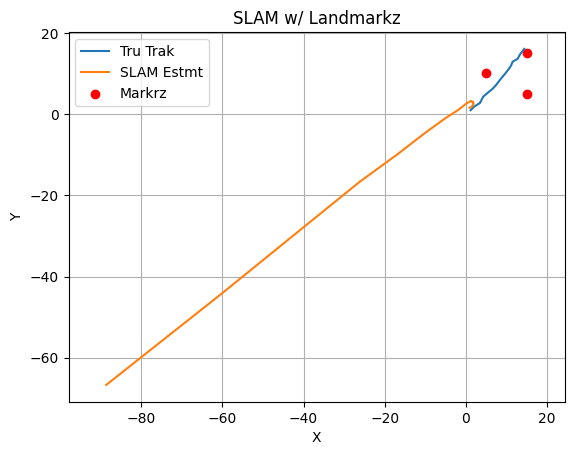

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(42)  # Fixed randomness

# Fixed markrz (landmarks)
markrz = np.array([[5, 10], [15, 5], [15, 15]])

# Initial postions
trupoz = np.array([0.0, 0.0])
gesspoz = np.array([0.0, 0.0])

# Path listz
trutrak = []
guestrak = []

# Noise lvls
motn_err = 0.3
obs_err = 0.5

# Fixd K gain
kk = 0.4

# Time steps
for i in range(15):
    ctrl = np.array([1.0, 1.0])
    motnz = ctrl + np.random.randn(2) * motn_err
    trupoz += motnz

    zzz = markrz - trupoz + np.random.randn(*markrz.shape) * obs_err

    estmov = ctrl + np.random.randn(2) * motn_err
    gesspoz += estmov

    lmi = 0
    exz = markrz[lmi] - gesspoz
    errr = zzz[lmi] - exz
    gesspoz += kk * errr

    trutrak.append(trupoz.copy())
    guestrak.append(gesspoz.copy())

trutrak = np.array(trutrak)
guestrak = np.array(guestrak)

plt.plot(trutrak[:, 0], trutrak[:, 1], label="Tru Trak")
plt.plot(guestrak[:, 0], guestrak[:, 1], label="SLAM Estmt")
plt.scatter(markrz[:, 0], markrz[:, 1], color='red', label="Markrz")
plt.title("SLAM w/ Landmarkz")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()
